# PROBLEM STATEMENT #
Sriktin, a sales manager from private estate agency wants to create a price list of all unoccupied houses residing in Cognixy Region. She wants to quote the houses price based on precedent sales as reasonable as she can, so that all the houses will be sold out in a blink of an eye.

Each house has their own selling point and from those data Sriktin has to estimate the price of the house in the most reasonable way. Nevertheless, the number of houses that she has to sell is about 2000, that become unviable to do it one by one

In [1]:
# import library that used to visualize, modeling and predict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [2]:
# read csv file to Dataframe
train_df = pd.read_csv('input/cognixy_housing_train.csv')
test_df = pd.read_csv('input/cognixy_housing_test.csv')
combine = [train_df, test_df]

In [3]:
# show sample of train dataframe
train_df.head()

,ID,Living Area,Total Area,Above the Ground Area,Basement Area,Neighbors Living Area,Neighbors Total Area,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Year Built,Year Renovated,Zipcode,Latitude,Longitude,Price
0,7237550110,348,6879,348,0,457,6879,4,3.25,2.0,0,0,3,10,2013,0,98053,47.6580,-122.006,1.770000e+10
1,8565000030,320,3108,320,0,261,3274,4,2.50,2.0,0,0,3,9,1997,0,98077,47.7673,-122.100,1.207500e+10
2,5347200179,120,178,78,42,120,124,3,2.00,2.0,0,0,3,8,2006,0,98126,47.5183,-122.376,4.050000e+09
3,3634100030,170,484,170,0,163,534,4,2.00,1.5,0,0,3,7,1951,0,98118,47.5331,-122.278,4.050000e+09
4,722039087,91,5341,91,0,194,2549,2,1.00,1.0,0,0,2,6,1949,0,98070,47.4145,-122.463,3.307500e+09


In [4]:
# show sample of test dataframe
test_df.head()

,ID,Living Area,Total Area,Above the Ground Area,Basement Area,Neighbors Living Area,Neighbors Total Area,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Year Built,Year Renovated,Zipcode,Latitude,Longitude
0,1921059045,118,730,118,0,94,602,2,1.00,1.0,0,0,4,6,1913,0,98002,47.3007,-122.228
1,8079030350,224,891,165,59,224,849,3,2.50,2.0,0,0,3,8,1993,0,98059,47.5093,-122.153
2,1995200200,140,565,79,61,140,530,3,1.00,1.0,0,0,4,6,1940,0,98115,47.6966,-122.324
3,2979800845,93,401,93,0,156,401,2,1.00,1.0,0,0,5,7,1924,0,98115,47.6846,-122.317
4,3448002180,215,626,179,36,157,626,3,3.25,2.0,0,0,3,9,2014,0,98125,47.7132,-122.293


In [5]:
# check the shape of each dataframe
print(train_df.shape)
print(test_df.shape)

(19613, 20)
(2000, 19)


In [6]:
# basic statistics of each columns
train_df.describe()

,ID,Living Area,Total Area,Above the Ground Area,Basement Area,Neighbors Living Area,Neighbors Total Area,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Year Built,Year Renovated,Zipcode,Latitude,Longitude,Price
count,1.961300e+04,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.00000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,19613.000000,1.961300e+04
mean,4.575716e+09,192.794422,1405.345791,165.763677,27.030745,184.122980,1188.551879,3.373069,2.116555,1.495794,0.007750,0.233264,3.40881,7.657064,1971.088309,84.858614,98077.915107,47.559826,-122.213653,8.097334e+09
std,2.875458e+09,85.056086,3824.486004,76.876411,41.065855,63.432395,2559.421380,0.932815,0.770380,0.539317,0.087694,0.763946,0.64969,1.177917,29.342417,402.692832,53.547127,0.138508,0.140909,5.428552e+09
min,1.000102e+06,26.000000,48.000000,26.000000,0.000000,37.000000,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,1.125000e+09
25%,2.123700e+09,132.000000,468.000000,111.000000,0.000000,138.000000,473.000000,3.000000,1.750000,1.000000,0.000000,0.000000,3.00000,7.000000,1952.000000,0.000000,98033.000000,47.470500,-122.328000,4.800000e+09
50%,3.904901e+09,178.000000,707.000000,144.000000,0.000000,170.000000,708.000000,3.000000,2.250000,1.500000,0.000000,0.000000,3.00000,7.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,6.750000e+09
75%,7.308900e+09,236.000000,995.000000,205.000000,52.000000,219.000000,937.000000,4.000000,2.500000,2.000000,0.000000,0.000000,4.00000,8.000000,1997.000000,0.000000,98118.000000,47.677900,-122.125000,9.675000e+09
max,9.900000e+09,1257.000000,153416.000000,874.000000,448.000000,576.000000,80937.000000,33.000000,8.000000,3.500000,1.000000,4.000000,5.00000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,1.032750e+11


In [7]:
# overview of null value in train dataframe
train_df.isna().sum()

ID                       0
Living Area              0
Total Area               0
Above the Ground Area    0
Basement Area            0
Neighbors Living Area    0
Neighbors Total Area     0
Bedrooms                 0
Bathrooms                0
Floors                   0
Waterfront               0
View                     0
Condition                0
Grade                    0
Year Built               0
Year Renovated           0
Zipcode                  0
Latitude                 0
Longitude                0
Price                    0
dtype: int64

In [8]:
# overview of null value in test dataframe
test_df.isna().sum()

ID                       0
Living Area              0
Total Area               0
Above the Ground Area    0
Basement Area            0
Neighbors Living Area    0
Neighbors Total Area     0
Bedrooms                 0
Bathrooms                0
Floors                   0
Waterfront               0
View                     0
Condition                0
Grade                    0
Year Built               0
Year Renovated           0
Zipcode                  0
Latitude                 0
Longitude                0
dtype: int64

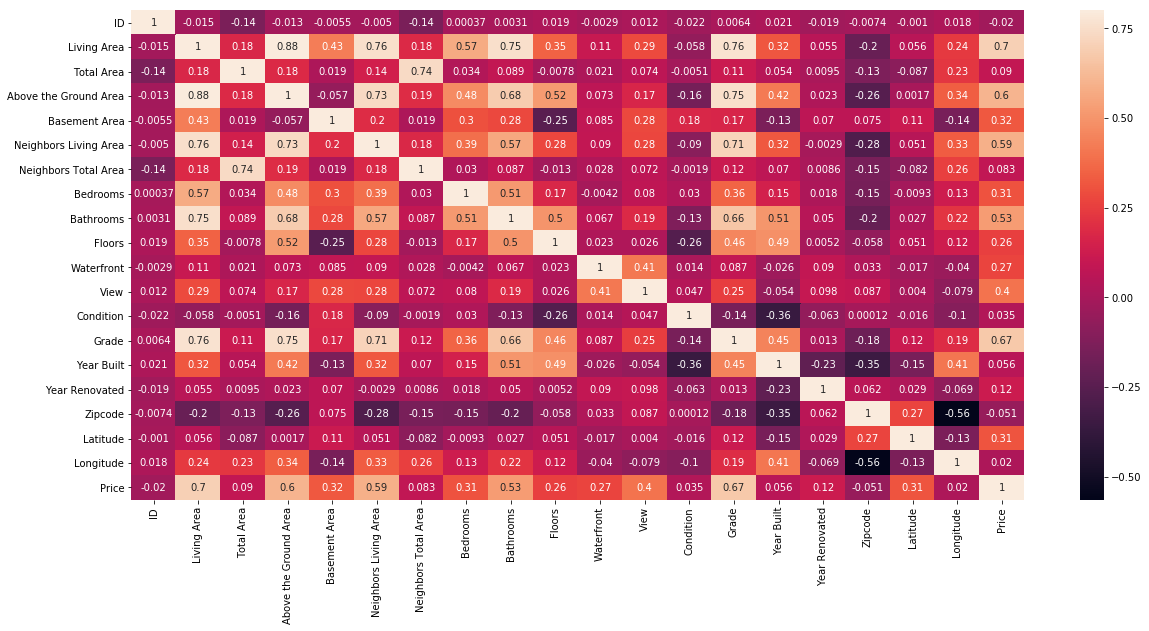

In [9]:
# Analyze the correlation each columns to know what the features
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

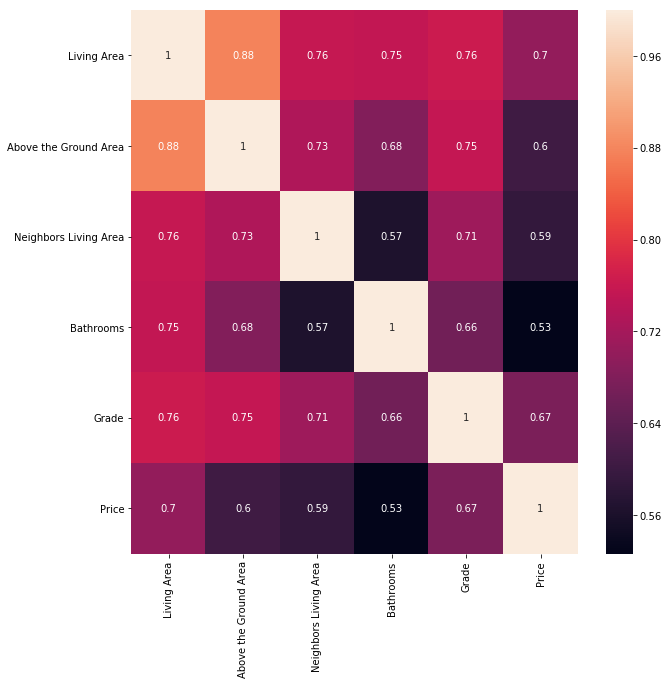

In [10]:
# visualize and analyze the high correlation which is correlation >=0.5

corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["Price"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True)


 mu = 8097333768.93 and sigma = 5428413725.80



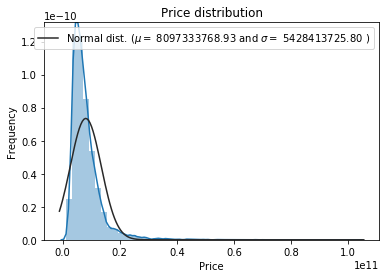

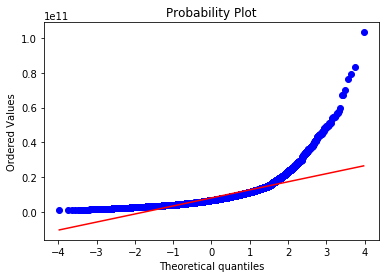

In [11]:
# because Price is the value that we want to predict, let make analysis for this column

sns.distplot(train_df['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(train_df['Price'], plot=plt)
plt.show()

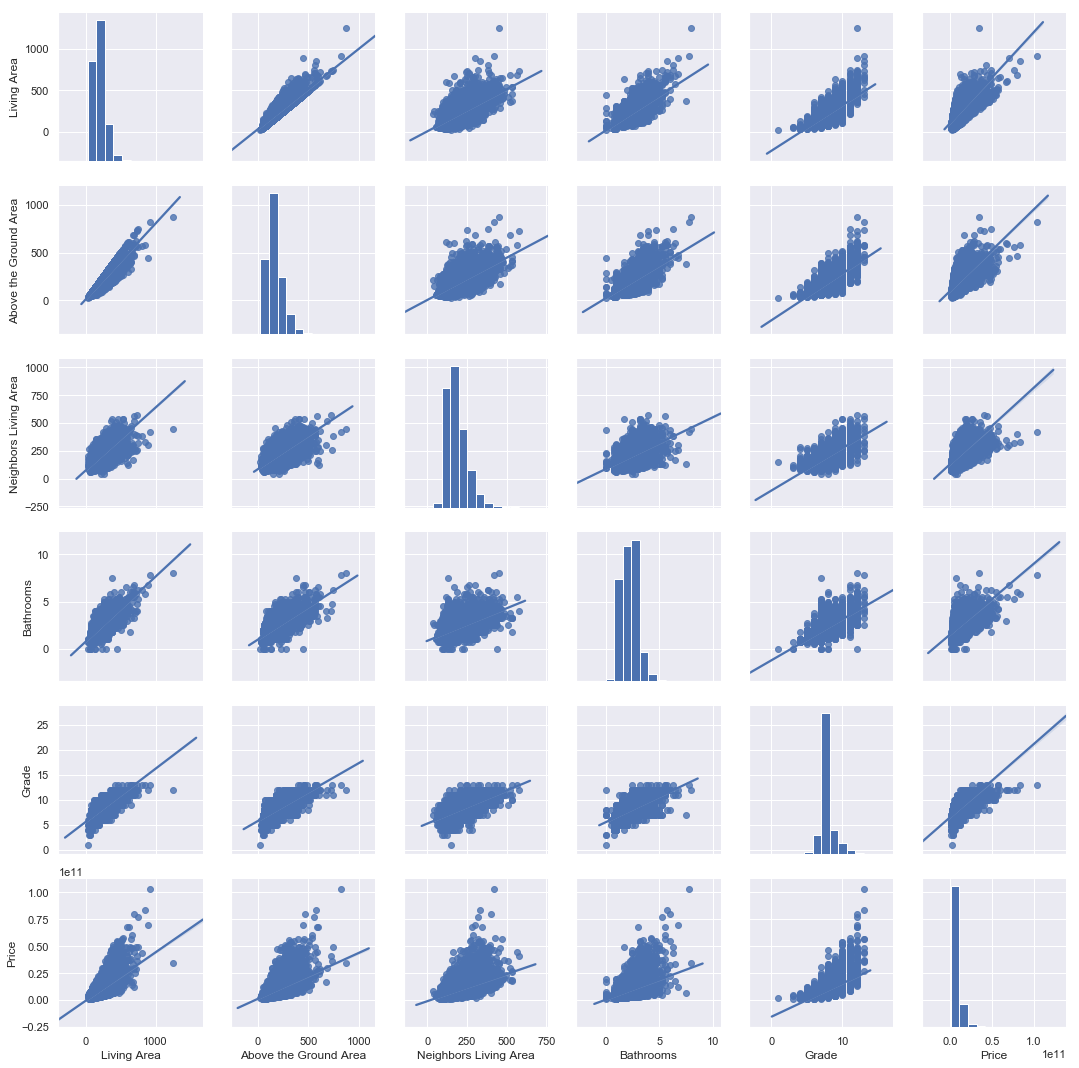

In [12]:
# make visualization of corelation all columns with price
top_corr_features
sns.set()
col = ['Living Area','Above the Ground Area','Neighbors Living Area','Bathrooms','Grade','Price']
g = sns.pairplot(train_df[col], height=2.5, kind='reg')

In [13]:
# Let sort the correlation of each feature
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(['Price'], ascending=False, inplace=True)
corr.Price

Find most important features relative to target


Price                    1.000000
Living Area              0.701494
Grade                    0.674505
Above the Ground Area    0.604550
Neighbors Living Area    0.589401
Bathrooms                0.526370
View                     0.399635
Basement Area            0.321208
Latitude                 0.311832
Bedrooms                 0.308440
Waterfront               0.272495
Floors                   0.255455
Year Renovated           0.121782
Total Area               0.090020
Neighbors Total Area     0.082656
Year Built               0.056424
Condition                0.035370
Longitude                0.019943
ID                      -0.019636
Zipcode                 -0.050662
Name: Price, dtype: float64

## PREPROCESSING ##

In [14]:
# after analysis we can delete the ID and Zipcode to clean the data and make better prediction
del train_df['ID']
del train_df['Zipcode']
train_df.head(5)

,Living Area,Total Area,Above the Ground Area,Basement Area,Neighbors Living Area,Neighbors Total Area,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Year Built,Year Renovated,Latitude,Longitude,Price
0,348,6879,348,0,457,6879,4,3.25,2.0,0,0,3,10,2013,0,47.6580,-122.006,1.770000e+10
1,320,3108,320,0,261,3274,4,2.50,2.0,0,0,3,9,1997,0,47.7673,-122.100,1.207500e+10
2,120,178,78,42,120,124,3,2.00,2.0,0,0,3,8,2006,0,47.5183,-122.376,4.050000e+09
3,170,484,170,0,163,534,4,2.00,1.5,0,0,3,7,1951,0,47.5331,-122.278,4.050000e+09
4,91,5341,91,0,194,2549,2,1.00,1.0,0,0,2,6,1949,0,47.4145,-122.463,3.307500e+09


In [15]:
# we store the test ID to new variable
test_ID = test_df['ID']

# let delete ID and Zipcode to clean the test data
del test_df['ID']
del test_df['Zipcode']
test_df.tail()

,Living Area,Total Area,Above the Ground Area,Basement Area,Neighbors Living Area,Neighbors Total Area,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Year Built,Year Renovated,Latitude,Longitude
1995,134,685,93,41,125,691,3,1.50,1.0,0,0,3,7,1968,0,47.7212,-122.179
1996,75,445,75,0,96,445,2,1.00,1.0,0,0,3,6,1919,0,47.5614,-122.270
1997,187,931,127,60,139,785,3,1.75,1.0,0,0,5,7,1952,0,47.7487,-122.319
1998,71,557,71,0,158,557,2,1.00,1.0,0,0,3,6,1953,0,47.6999,-122.364
1999,222,870,222,0,191,679,6,3.00,2.0,0,0,3,7,1991,0,47.3262,-122.214


In [16]:
# Let make preprocessing in modeling
# store the price in variable y and delet it from train dataset
y = train_df['Price']
del train_df['Price']

In [17]:
# Get just values in dataframe, no index and columns
X = train_df.values
Y = y.values

In [18]:
# split the train dataframe to train and test
# this step is important to check the accuracy of prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

## Model Experiment ##

### Linear Regression ###

In [19]:
# first model that we choose is Linear Regression
model = linear_model.LinearRegression()
# model fitting in linear regression
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# print accuracy of  linear regression model
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  70.67624536146685


### Random Forest Regressor ###

In [22]:
# second model experiment is Random Forest Regressor
RFR = RandomForestRegressor(n_estimators=1000)
# fit the model
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
# print accuracy of the model
print("Accuracy --> ", RFR.score(X_test, y_test)*100)

Accuracy -->  88.25889431061387


### Gradient Boosting Regressor ###

In [24]:
# Third model experiment with Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=5)
# fit the model
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
# print accuracy of the model
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  88.92475559034804


### Ridge ###

In [26]:
# Fourth model experiment with ridge regression
ridge = Ridge(alpha=0.5)
# fit the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
# print accuracy of the model
print("Accuracy --> ", ridge.score(X_test, y_test)*100)

Accuracy -->  70.67970879254133


## PREDICTION ##

In [28]:
# get values of test data
test_X = test_df.values

In [29]:
# Make prediction with best accuracy model (Gradient Boosting Regressor)
output_y = GBR.predict(test_X)
output_y

array([2.94130977e+09, 6.96020030e+09, 6.04257047e+09, ...,
       6.40013940e+09, 4.80977097e+09, 4.37054694e+09])

In [30]:
# Concating the ID and output prediction in same Dataframe
result = pd.DataFrame(columns=['ID','Price'])
result['Price'] = output_y
result['ID'] = test_ID

In [31]:
# get sample of output prediction
result.head(10)

,ID,Price
0,1921059045,2.941310e+09
1,8079030350,6.960200e+09
2,1995200200,6.042570e+09
3,2979800845,8.064022e+09
4,3448002180,1.133576e+10
5,9510320150,8.259828e+09
6,7942600310,6.624964e+09
7,1310440590,6.154419e+09
8,1257200050,1.630397e+10
9,452001540,9.046504e+09


In [32]:
# Convert the result to csv file
result.to_csv('OutputPrice.csv',index=False)